笔记是看的是B站UP主:蚂蚁学Python的视频学习时所作     他的Github主页：https://github.com/peiss   

⚠注意：这个笔记文件路径均是绝对路径；笔记仅供学习使用；为保证学习效果，笔记基本纯手打，所以可能会有亿点点错别字

In [1]:
import pandas as pd   #导库

#  一：pandas数据的读取:
#### pd.read_csv  读取csv、tsv、txt等特定格式分割的纯文本数据文件
#### pd.read_excel 读取xls/xslx格式的excel文件
#### pd.read_sql  读取MySQL等关系型数据库

In [2]:
'''读取csv文件'''
datafile= "D:/编程项目/python项目/bigdata/data/pdData.csv"
data=pd.read_csv(datafile)   #读取实验数据

In [3]:
data.head()  #查看前几行数据   最上一行时列名 最左一行则是表的索引 中间的才算数据体

,序号,商品名称,价格,数量
0,1,苹果,12,54
1,2,香蕉,13,34
2,3,菠萝,20,23
3,4,葡萄,12,45
4,5,水蜜桃,14,23


In [4]:
data.shape    #返回数据形状(行，列)

(8, 4)

In [5]:
data.columns   #返回列名

Index(['序号', '商品名称', '价格', '数量'], dtype='object')

In [6]:
data.index    #返回索引

RangeIndex(start=0, stop=8, step=1)

In [7]:
data .dtypes    #返回每个列的数据类型

序号       int64
商品名称    object
价格       int64
数量       int64
dtype: object

## 读取txt文件，自定义分隔符与列名(源文件不存在列名)

In [8]:
file= "D:/编程项目/python项目/bigdata/data/pdData.txt"
data=pd.read_csv(file
                 ,sep="="   #指定列的分隔符
                 ,header=None    #告诉pamdas这文件没有标题行，否则pandas会将第一行作为标题行
                 ,names=["年份","数据1","数据2","数据3"]   #自定义列名
)
data

,年份,数据1,数据2,数据3
0,2020-10-12,1424.342,21323123,3123123
1,2020-10-14,1424.542,7567123,9126753
2,2010-10-21,1344.332,21654623,3122343
3,2020-11-15,1424.323,21323123,2532413


In [9]:
'''读取excel文件'''
file= "D:/编程项目/python项目/bigdata/data/pdData.xlsx"
data=pd.read_excel(file)
data

,序号,商品名称,价格,数量
0,1,苹果,12,54
1,2,香蕉,13,34
2,3,菠萝,20,23
3,4,葡萄,12,45
4,5,水蜜桃,14,23
5,6,榴莲,15,45
6,7,雪梨,14,32
7,8,李子,15,67


## 读取SQL数据库

In [10]:
import pymysql  #首先需要一个访问MySql数据库的库
database=pymysql.connect(      #利用现有库获取连接
    host="127.0.0.1"   #主机
    ,user="root"     #用户
    ,password="123456"  #密码
    ,database="bookmanager"  #数据库
    #,charset="utf_8"    #指定编码方式(抛出属性错误时可去掉)
)
mysql_data=pd.read_sql(
    "select * from book"    #需要一查询语句
    ,con=database
)
mysql_data

,id,book_name,type_id,author,publish,price,number,status,remark
0,1,西游记,3,吴承恩,机械工业出版社,23.0,213,1,四大名著之一
1,2,SpringCloud微服务架构开发,1,黑马程序员,人民邮电出版社,28.0,20,1,微服务实战开发
2,3,水浒传,3,施耐庵,人民文学出版社,29.0,30,1,四大名著之一
3,4,Java基础入门（第2版）,1,黑马程序员,清华大学出版社,30.2,22,1,提高Java编程功底必备
4,5,中国文学编年史,2,陈文新,湖南人民出版社,35.3,36,1,中国文学编年史
5,6,JavaWeb程序设计任务教程,1,黑马程序员,人民邮电出版社,25.5,16,1,学习JavaWeb的好帮手
6,7,SSH框架整合实战教程,1,传智播客高教产品研发部,清华大学出版社,59.0,12,1,SSH项目开发实战
7,8,朝花夕拾,3,鲁迅,辽海出版社,44.6,30,1,鲁迅小说全集系列
8,9,彷徨,3,鲁迅,辽海出版社,44.6,16,1,鲁迅小说全集系列
9,10,呐喊,3,鲁迅,辽海出版社,44.5,16,1,鲁迅小说全集系列


# 二：Pandas的数据结构
#### DataFrame结构：二位数据，整个表格，多列多行
#### Series结构：一维数据，常表示某一列或一行

In [11]:
import pandas as pd
import numpy as np   #导入老朋友numpy备用

## Series
Series更像是一种一维数组的结构，是由一组(可以是不同数据类型)的数据与其索引组成，有点像原生的字典

In [12]:
sl=pd.Series([1,"a",'b',2,3.555,4,print])   #吐槽：为什么这个方法首字母是大写！！
sl     #左侧那行是索引，右侧是数据    (和字典一样，什么类型都吃)

0                            1
1                            a
2                            b
3                            2
4                        3.555
5                            4
6    <built-in function print>
dtype: object

In [13]:
sl.index  #获取索引（0-7(不包含)，步长1）

RangeIndex(start=0, stop=7, step=1)

In [14]:
sl.values   #获取数据

array([1, 'a', 'b', 2, 3.555, 4, <built-in function print>], dtype=object)

可以创建一个自定义索引的Series

In [15]:
sl2 = pd.Series(["小明","男",14],index=["姓名","性别","年龄"])
sl2

姓名    小明
性别     男
年龄    14
dtype: object

In [16]:
sl2["姓名"]    #可通过索引查找

'小明'

可以通过字典生成Series

In [17]:
dict1={"学校":"福州职业技术学院","系部":"信息技术工程系","年段":20,"班级":"20软2"}
sl3=pd.Series(dict1)
sl3

学校    福州职业技术学院
系部     信息技术工程系
年段          20
班级        20软2
dtype: object

Series类型数据的使用(类似原生字典)

In [18]:
sl3["学校"]

'福州职业技术学院'

In [19]:
type(sl3["学校"])    #返回原生变量

str

In [20]:
sl3[["学校","系部"]]

学校    福州职业技术学院
系部     信息技术工程系
dtype: object

In [21]:
type(sl3[["学校","系部"]])    #查询多个数据时返回的是Series类型

pandas.core.series.Series

## DataFrame
#### Dataframe是一个表格类型数据
###### ----每列可以是不同数据类型的值
###### ----既有行索引（index） 也有列索引（colimns）
###### ----可以看作是Series组成的类似二维字典的对象
###### 

根据字典创建DataFrame

In [22]:
dict2={
    "省份":["福建","福建","湖北","湖北"]
    ,"年份":[2019,2018,2019,2018]
    ,"GDP(亿元)":[42395,35804.04,22777.69,39366.55]
}
df=pd.DataFrame(dict2)
df

,省份,年份,GDP(亿元)
0,福建,2019,42395.00
1,福建,2018,35804.04
2,湖北,2019,22777.69
3,湖北,2018,39366.55


福建可以啊

In [23]:
df.dtypes    #返回的1是一整个列的数据类型

省份          object
年份           int64
GDP(亿元)    float64
dtype: object

In [24]:
df.columns  #列索引

Index(['省份', '年份', 'GDP(亿元)'], dtype='object')

In [25]:
df.index    #行索引

RangeIndex(start=0, stop=4, step=1)

### 从DataFreme的切片
##### ----切片结果是一维的，返回Series类型数据
#### ----切片结果是二位的，返回的则是DataFrame类型数据

#### 查询列

In [26]:
df["省份"]     #只查询一列

0    福建
1    福建
2    湖北
3    湖北
Name: 省份, dtype: object

In [27]:
type(df["省份"])   #返回的是Series类型

pandas.core.series.Series

In [28]:
df[["省份","年份"]]     #查询多列

,省份,年份
0,福建,2019
1,福建,2018
2,湖北,2019
3,湖北,2018


In [29]:
type(df[["省份","年份"]] )  #返回的则是DataFrame类型（二维数据）

pandas.core.frame.DataFrame

#### 查询行

In [30]:
df.loc[1]   #只查询一行

省份               福建
年份             2018
GDP(亿元)    35804.04
Name: 1, dtype: object

In [31]:
type(df.loc[1])  #返回的是Series类型

pandas.core.series.Series

In [32]:
df.loc[[1,2],"省份"]   #查询多行（传入列表进行查询）

1    福建
2    湖北
Name: 省份, dtype: object

In [33]:
type(df.loc[[1,2],"省份"])  #注意这时是Series类型（一维数据）

pandas.core.series.Series

#### 其他查询/切片

In [34]:
df.loc[1:3]   #行区间索引1-3(包含！！！！)

,省份,年份,GDP(亿元)
1,福建,2018,35804.04
2,湖北,2019,22777.69
3,湖北,2018,39366.55


In [35]:
df.loc[1:3]['年份']  #行区间索引1-3（包含！！！） 列索引“年份”

1    2018
2    2019
3    2018
Name: 年份, dtype: int64

In [36]:
df.loc[df["年份"]==2018]    #条件查询 2018年的数据

,省份,年份,GDP(亿元)
1,福建,2018,35804.04
3,湖北,2018,39366.55


In [37]:
df["年份"]==2018    #中间的条件按表达式会返回每个查询结果（行/列）的布尔值，上述查询只会返回布尔值为True的结果

0    False
1     True
2    False
3     True
Name: 年份, dtype: bool

In [38]:
df.loc[(df["年份"]==2018) & (df["省份"]=="福建")]    #也同样支持逻辑运算符（注意括号）

,省份,年份,GDP(亿元)
1,福建,2018,35804.04


In [39]:
df.loc[lambda df : (df["年份"]==2019) & (df["省份"]=="福建")]   #条件查询也可使用函数实现（非匿名函数就不演示了）

,省份,年份,GDP(亿元)
0,福建,2019,42395.0


In [40]:
df.iloc[1:2][0:]     #行索引1-2(不包含！！)(若超出，超出部分不会抛出异常，则显示全部);列索引 0-后面所有
#iloc使用行列索引号

,省份,年份,GDP(亿元)
1,福建,2018,35804.04


In [41]:
df.head()    #查询头五行(小于五行则全部显示)

,省份,年份,GDP(亿元)
0,福建,2019,42395.00
1,福建,2018,35804.04
2,湖北,2019,22777.69
3,湖北,2018,39366.55


# pandas 新增/修改数据列
#### 在进行数据分析的时候，常常需要按照条件添加/修改数据，再进行分析
##### ----直接赋值
##### ----df.apply
##### ----df.assign
##### ----按条件分组分别赋值

In [42]:
'''读取excel文件'''
file= "D:/编程项目/python项目/bigdata/data/pdData.xlsx"
data1=pd.read_excel(file)
data1.head()

,序号,商品名称,价格,数量
0,1,苹果,12,54
1,2,香蕉,13,34
2,3,菠萝,20,23
3,4,葡萄,12,45
4,5,水蜜桃,14,23


### 直接赋值法

In [43]:
data1.loc[4,"价格"]=16
data1.loc[4,"价格"]      #给水蜜桃涨价    注意，这些方法仅仅是修改了data1对象，并非修改原始文件

16

In [44]:
data1.loc[:,"总共价格"]=data1["价格"] * data1["数量"]   #新增数列只需给一个不存在的列名赋值
data1                   #两个Series相乘（及Series对应的index相乘）

,序号,商品名称,价格,数量,总共价格
0,1,苹果,12,54,648
1,2,香蕉,13,34,442
2,3,菠萝,20,23,460
3,4,葡萄,12,45,540
4,5,水蜜桃,16,23,368
5,6,榴莲,15,45,675
6,7,雪梨,14,32,448
7,8,李子,15,67,1005


### df.appay方法
##### ----传入一个函数，返回一个Series

In [45]:
def get_kc(x):
    if x["数量"] >=30:
        return "库存充足"
    elif x["数量"]<30 and x["数量"]>=0 :
        return "库存告急"
    else:
        return "数据异常"
    
data1.loc[:,"库存状态"]=data1.apply(get_kc,axis=1)   #传入一个函数，返回一个Series
data1["库存状态"].value_counts()  #新知识：Series.value_counts()返回每个值计数结果

库存充足    6
库存告急    2
Name: 库存状态, dtype: int64

### df.assign方法
##### ----它可以同时新增多个列（反复调用appay其实也一样）
##### ----appay需要指定axis值来确定DataFrame的行/列，而assign直接传入行/列

In [46]:
s=pd.Series([11,12,13],name='S')
data=np.arange(21,24)
df=pd.DataFrame({'A':[31,32,33],'B':[41,42,43]})
fun=lambda x:x.A+x.B
 
df.assign(C=fun,D=df.A+df.B,E=s,F=data)#增加新列

,A,B,C,D,E,F
0,31,41,72,72,11,21
1,32,42,74,74,12,22
2,33,43,76,76,13,23


### 按条件选择分组分别赋值

In [47]:
data1["价位"]=""   #广播赋值到整个Series
data1.loc[data1["价格"]>=15,"价位"] ="较高"   #赋值到符合条件表达式的元素
data1.loc[data1["价格"]<15,"价位"] ="较低"
data1

,序号,商品名称,价格,数量,总共价格,库存状态,价位
0,1,苹果,12,54,648,库存充足,较低
1,2,香蕉,13,34,442,库存充足,较低
2,3,菠萝,20,23,460,库存告急,较高
3,4,葡萄,12,45,540,库存充足,较低
4,5,水蜜桃,16,23,368,库存告急,较高
5,6,榴莲,15,45,675,库存充足,较高
6,7,雪梨,14,32,448,库存充足,较低
7,8,李子,15,67,1005,库存充足,较高


# pandas数据统计函数
### 1·汇总分类法
### 2·唯一去重和按值去重
### 3·相关系数和谐方差

In [48]:
#使用mysql中的书数据
import pymysql  #首先需要一个访问MySql数据库的库
database=pymysql.connect(      #利用现有库获取连接
    host="127.0.0.1"   #主机
    ,user="root"     #用户
    ,password="123456"  #密码
    ,database="bookmanager"  #数据库
    #,charset="utf_8"    #指定编码方式(抛出属性错误时可去掉)
)
mysql_data=pd.read_sql(
    "select * from book"    #需要一查询语句
    ,con=database
)
mysql_data.head()

,id,book_name,type_id,author,publish,price,number,status,remark
0,1,西游记,3,吴承恩,机械工业出版社,23.0,213,1,四大名著之一
1,2,SpringCloud微服务架构开发,1,黑马程序员,人民邮电出版社,28.0,20,1,微服务实战开发
2,3,水浒传,3,施耐庵,人民文学出版社,29.0,30,1,四大名著之一
3,4,Java基础入门（第2版）,1,黑马程序员,清华大学出版社,30.2,22,1,提高Java编程功底必备
4,5,中国文学编年史,2,陈文新,湖南人民出版社,35.3,36,1,中国文学编年史


### 1·汇总类统计  (主要针对数字类型数据)

In [49]:
#提取数据所有数字列的统计结果
mysql_data.describe() #计数/平均值/标准差/最小值/25~75分位数/最大值

,id,type_id,price,number,status
count,13.00000,13.0,13.000000,13.000000,13.0
mean,7.00000,2.0,37.400000,36.769231,1.0
std,3.89444,1.0,13.451518,53.560175,0.0
min,1.00000,1.0,23.000000,11.000000,1.0
25%,4.00000,1.0,28.000000,16.000000,1.0
50%,7.00000,2.0,30.200000,22.000000,1.0
75%,10.00000,3.0,44.600000,30.000000,1.0
max,13.00000,3.0,66.000000,213.000000,1.0


In [50]:
mysql_data["price"].max()#可以查看某一列的某个统计值

66.0

In [51]:
mysql_data["price"].mean()

37.400000000000006

In [52]:
mysql_data.max()  #同样可以查看所有列的

id                 13
book_name        阿Q正传
type_id             3
author          黑马程序员
publish         辽海出版社
price            66.0
number            213
status              1
remark       鲁迅小说全集系列
dtype: object

### 2·唯一去重和按值计数

#### ------唯一去重
一般不用于数值列，而是枚举、分类列

In [53]:
mysql_data["author"].unique()   #去重顺序返回

array(['吴承恩', '黑马程序员', '施耐庵 ', '陈文新', '传智播客高教产品研发部', '鲁迅', '周志华'],
      dtype=object)

In [54]:
type(mysql_data["author"].unique()) #返回的是numpy的n维数组类型

numpy.ndarray

#### ------按值计数
去重结果会按照降序排列

In [55]:
mysql_data["author"].value_counts()

黑马程序员          4
鲁迅             4
吴承恩            1
施耐庵            1
陈文新            1
传智播客高教产品研发部    1
周志华            1
Name: author, dtype: int64

In [56]:
type(mysql_data["author"].value_counts())#返回的是pandas的Series类型

pandas.core.series.Series

### 相关系数和协方差 

#### ----谐方差（右边有大佬解释）   https://www.zhihu.com/question/20852004

两个变量在变化过程同方向/反方向变化程度

#### ----相关系数  (右边有大佬解释）  https://www.zhihu.com/question/20852004

衡量相似程度，如果为正，则说明两个变量同向变化，为负则异向

为1时同向相似程度最大，反之-1反向相似度最小

用途：两只股票是否同时涨跌，程度如何？产品销量的波动和那些因素有关？

In [57]:
mysql_data.cov()   #谐方差矩阵   其实我的数据不好

,id,type_id,price,number,status
id,15.166667,-0.166667,28.008333,-102.416667,0.0
type_id,-0.166667,1.000000,-1.791667,19.500000,0.0
price,28.008333,-1.791667,180.943333,-284.825000,0.0
number,-102.416667,19.500000,-284.825000,2868.692308,0.0
status,0.000000,0.000000,0.000000,0.000000,0.0


In [58]:
mysql_data.corr()   #相关系数矩阵

,id,type_id,price,number,status
id,1.000000,-0.042796,0.534652,-0.491002,NaN
type_id,-0.042796,1.000000,-0.133194,0.364076,NaN
price,0.534652,-0.133194,1.000000,-0.395335,NaN
number,-0.491002,0.364076,-0.395335,1.000000,NaN
status,NaN,NaN,NaN,NaN,NaN


In [59]:
mysql_data["type_id"].corr(mysql_data["price"])   #可以单独查看两者的关系

-0.13319438611805307

# Pandas对缺省值的处理
Pandas使用这些方法处理缺失值

In [60]:
import pandas as pd   #导库

导入原始数据(原始数据存在大量空行，姓名单元格被合并，存在考生小王数学成绩丢失)

In [61]:
stu_data=pd.read_excel("D:/编程项目/python项目/bigdata/data/student_excel.xlsx"
                          ,skiprows=2)   #新知识点:reas_xxx的skiprows属性可以掠过顶部几个行

In [62]:
stu_data  #数据来源 蚂蚁学Python https://github.com/peiss/ant-learn-pandas/tree/master/datas/student_excel

,Unnamed: 0,姓名,科目,分数
0,NaN,小明,语文,85.0
1,NaN,NaN,数学,80.0
2,NaN,NaN,英语,90.0
3,NaN,NaN,NaN,NaN
4,NaN,小王,语文,85.0
5,NaN,NaN,数学,NaN
6,NaN,NaN,英语,90.0
7,NaN,NaN,NaN,NaN
8,NaN,小刚,语文,85.0
9,NaN,NaN,数学,80.0


## isnull和notnull可以检测是否为空值
#### 可用于DataFrame与Series

In [63]:
stu_data.isnull()   #检测是否为空值

,Unnamed: 0,姓名,科目,分数
0,True,False,False,False
1,True,True,False,False
2,True,True,False,False
3,True,True,True,True
4,True,False,False,False
5,True,True,False,True
6,True,True,False,False
7,True,True,True,True
8,True,False,False,False
9,True,True,False,False


In [64]:
stu_data["分数"].isnull()#可以再单列上判断是否为空值

0     False
1     False
2     False
3      True
4     False
5      True
6     False
7      True
8     False
9     False
10    False
Name: 分数, dtype: bool

In [65]:
stu_data["姓名"].notnull() #当然，还有不为空值----与isnull相反

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
Name: 姓名, dtype: bool

In [66]:
stu_data.loc[stu_data["分数"].notnull()]  #结合之前知识点返回分数不为空的行

,Unnamed: 0,姓名,科目,分数
0,NaN,小明,语文,85.0
1,NaN,NaN,数学,80.0
2,NaN,NaN,英语,90.0
4,NaN,小王,语文,85.0
6,NaN,NaN,英语,90.0
8,NaN,小刚,语文,85.0
9,NaN,NaN,数学,80.0
10,NaN,NaN,英语,90.0


## dropna：丢弃、删除缺失值
##### -----axis:删除行(=0 or ='index')/列 (=1 or ='columns')
##### -----how：如果等于"any"则任何值为空的都删除，如果等于"all"则当所有值为空才删除
##### -----inplace：如果等于True则修改当前DataFrame，否者返汇新的DataFrame

In [67]:
stu_data.dropna(axis=1    #按列删除
                ,how="all"   #该行所有数据为空才删除
                ,inplace=True  #仅修改当前df
               )
stu_data.head()  #可见第0列被删除

,姓名,科目,分数
0,小明,语文,85.0
1,NaN,数学,80.0
2,NaN,英语,90.0
3,NaN,NaN,NaN
4,小王,语文,85.0


In [68]:
stu_data.dropna(axis=0    #按行删除
                ,how="all"   #该行所有数据为空才删除
                ,inplace=True  #仅修改当前df
               )
stu_data.head()  #可见中间空行被删除

,姓名,科目,分数
0,小明,语文,85.0
1,NaN,数学,80.0
2,NaN,英语,90.0
4,小王,语文,85.0
5,NaN,数学,NaN


当前还剩下以下问题：部分姓名为空（单元格合并导致），小王数学成绩为空

## fillna：填充空值
##### -----value(缺省)：用于填充的值，值可以是当个值，或是字典（字典的key为列名，value为值）
##### ------method：等于ffill时使用前一个不为空的值填充f；等于bfill使用后一个不为空的值填充
##### ------axis：指定按 行(=0 or ='index')/列 (=1 or ='columns') 填充
##### ------inplace：如果为True则修改但钱DataFrame，否者返回新的DataFrame

In [69]:
stu_data.fillna({"分数":0},inplace=True)  #方法一：向fillna传入字典 （分数列为空填充0）
stu_data   #小王的数学分数被填充上了0

,姓名,科目,分数
0,小明,语文,85.0
1,NaN,数学,80.0
2,NaN,英语,90.0
4,小王,语文,85.0
5,NaN,数学,0.0
6,NaN,英语,90.0
8,小刚,语文,85.0
9,NaN,数学,80.0
10,NaN,英语,90.0


In [70]:
stu_data.loc[:,"姓名"] = stu_data["姓名"].fillna(method="ffill")
#方法二：赋值法，这里是用前一个不为空的值进行填充
stu_data

,姓名,科目,分数
0,小明,语文,85.0
1,小明,数学,80.0
2,小明,英语,90.0
4,小王,语文,85.0
5,小王,数学,0.0
6,小王,英语,90.0
8,小刚,语文,85.0
9,小刚,数学,80.0
10,小刚,英语,90.0


## 将清洗好的数据进行保存

In [71]:
stu_data.to_excel("D:\\编程项目\\python项目\\bigdata\\data\\student_excel_clean.xlsx"
                 ,index=False  #不保存行索引
                 )

# Pandas数据排序

In [72]:
import pandas as pd

In [73]:
tq_data=pd.read_csv("D:/编程项目/python项目/bigdata/data/beijing_tianqi_2018.csv")  #天气数据来自UP主的Github

In [74]:
tq_data.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


### Series的排序

#### Series.sort_values(ascending=True,inplace=False)
##### -----ascending:为True升序（默认），False降序
##### -----inplace：是否修改原始Series，默认不修改

In [75]:
tq_data["aqi"].sort_values()   #左侧为索引，右侧为数据，默认升序排列，不修改原数据内容

271     21
281     21
249     22
272     22
301     22
      ... 
317    266
71     287
91     287
72     293
86     387
Name: aqi, Length: 365, dtype: int64

In [76]:
tq_data["aqi"].sort_values(ascending=False)   #修改ascending返回结果为降序

86     387
72     293
71     287
91     287
317    266
      ... 
249     22
301     22
272     22
271     21
281     21
Name: aqi, Length: 365, dtype: int64

In [77]:
tq_data["tianqi"].sort_values()

225     中雨~小雨
230     中雨~小雨
197    中雨~雷阵雨
196    中雨~雷阵雨
112        多云
        ...  
191    雷阵雨~大雨
219     雷阵雨~阴
335      雾~多云
353         霾
348         霾
Name: tianqi, Length: 365, dtype: object

### DataFrame的排序

#### 一、DataFrame.sort_balues(by,ascending=True,inplace=False)
##### -----by:以那行进行排序，字符串或者List<字符串>,当列或多列排序
##### -----axis:若axis=0或者'index'(默认),按照指定的列排序，若axis=1或者'columns',按照指定的行排序
##### -----ascending：默认是True,上升排序，False则为降序排列
##### -----inplace：是否用排序后的数据集替换原来的数据，默认为False，即不替换

In [78]:
tq_data.sort_values(by="aqi").head(3)  #指定按空气质量指数升序排列(对排序列所在的整个行进行排序)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
271,2018-09-29,22℃,11℃,晴,北风,3-4级,21,优,1
281,2018-10-09,15℃,4℃,多云~晴,西北风,4-5级,21,优,1
249,2018-09-07,27℃,16℃,晴,西北风,3-4级,22,优,1


In [79]:
tq_data.sort_values(by="aqi",ascending=False).head(3)  #指定按空气质量指数降序排列

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
86,2018-03-28,25℃,9℃,多云~晴,东风,1-2级,387,严重污染,6
72,2018-03-14,15℃,6℃,多云~阴,东北风,1-2级,293,重度污染,5
71,2018-03-13,17℃,5℃,晴~多云,南风,1-2级,287,重度污染,5


In [80]:
tq_data.sort_values(by=["aqi","bWendu"]).head(3)   #多个参数进行排序时前面的参数优先级更高

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
281,2018-10-09,15℃,4℃,多云~晴,西北风,4-5级,21,优,1
271,2018-09-29,22℃,11℃,晴,北风,3-4级,21,优,1
301,2018-10-29,15℃,3℃,晴,北风,3-4级,22,优,1


In [81]:
tq_data.sort_values(by=["aqi","bWendu"],ascending=[True,False]).head(3)  #升降序也可以分别设置

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
271,2018-09-29,22℃,11℃,晴,北风,3-4级,21,优,1
281,2018-10-09,15℃,4℃,多云~晴,西北风,4-5级,21,优,1
249,2018-09-07,27℃,16℃,晴,西北风,3-4级,22,优,1


#### 二、利用DataFrame.take进行排列  (例：随机排列)
- 
#### indices ：array-like：
* 一个整数数组，指示要排列的位置。
#### axis ：{0 或 ‘index’, 1 或 ‘columns’, None}, 默认为 0：
* 选择元素的轴。0表示选择行，1表示选择列。
#### is_copy ：bool
* 在pandas 1.0之前，
* is_copy=False可以指定以确保返回值是实际副本。
* 从pandas 1.0开始， take始终返回一个副本，
* 从1.0.0版开始不推荐使用。
#### **kwargs
* 用于与numpy.take()兼容。

In [82]:
#利用shape获得行数如何生成函数个的1~行数 的随机不重复array
rarray=np.random.permutation(tq_data.shape[0])[:10]
rarray

array([ 23,  90, 245, 263, 239,  44,  91, 191, 111, 223])

In [83]:
tq_data.take(rarray).head(3)  #利用刚刚的随机array带入take方法实现随机排列

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
23,2018-01-24,-4℃,-11℃,晴,西南风,1-2级,34,优,1
90,2018-04-01,25℃,11℃,晴~多云,南风,1-2级,218,重度污染,5
245,2018-09-03,30℃,19℃,晴,北风,3-4级,70,良,2


# Pandas字符串的处理

使用方法：先获取Series的str属性，然后在属性上调用函数

只能在字符串列上使用(字符串列一般在object列里)

DataFrame上没有str属性和处理方法

Series.str与原生的str类似，但这是一套独立的方法

具体有那些方法https://pandas.pydata.org/docs/reference/series.html
（搜索String handling，下面都是）

In [84]:
tq_data.dtypes  #查看每个列的类型

ymd          object
bWendu       object
yWendu       object
tianqi       object
fengxiang    object
fengli       object
aqi           int64
aqiInfo      object
aqiLevel      int64
dtype: object

## 常用方法

In [85]:
tq_data["tianqi"].str

In [86]:
# tq_data.str   #DataFrame数据不能使用

### Series.str.replace()  替换

In [87]:
tq_data["bWendu"].str.replace("℃","")  #返回将最高温的℃符号替换成空字符串后的列

0       3
1       2
2       2
3       0
4       3
       ..
360    -5
361    -3
362    -3
363    -2
364    -2
Name: bWendu, Length: 365, dtype: object

In [88]:
tq_data.head()    #注意！！，以下方法皆是只返回处理结果，并不修改原数据

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


### Series.str.isnumeric()   判断是否为纯数字

In [89]:
tq_data["bWendu"].str.isnumeric()  #返回这个字符串是否纯全数字（布尔类型）

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: bWendu, Length: 365, dtype: bool

### Series.str.len()   返回列各字符串长度;与原生不同，这是方法

In [90]:
tq_data["fengxiang"].str.len()

0      3
1      3
2      2
3      3
4      3
      ..
360    3
361    3
362    3
363    3
364    3
Name: fengxiang, Length: 365, dtype: int64

### Series.str.startswith()  / Series.str.contains() 
#### 返回布尔类型的Series查询结果

In [91]:
tq_data["fengxiang"].str.startswith("东北风")

0       True
1       True
2      False
3       True
4      False
       ...  
360    False
361    False
362    False
363     True
364     True
Name: fengxiang, Length: 365, dtype: bool

In [92]:
tq_data["fengxiang"].str.contains("东北风")

0       True
1       True
2      False
3       True
4      False
       ...  
360    False
361    False
362    False
363     True
364     True
Name: fengxiang, Length: 365, dtype: bool

In [93]:
tq_data[tq_data["fengxiang"].str.contains("东北风")].head()  #前五个刮东北风的当天数据

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
20,2018-01-21,0℃,-5℃,阴~小雪,东北风,1-2级,63,良,2
24,2018-01-25,-3℃,-11℃,多云,东北风,1-2级,27,优,1


## str.xx方法的链式使用的注意事项

In [94]:
tq_data["fengxiang"].replace("风","").str.len()

0      3
1      3
2      2
3      3
4      3
      ..
360    3
361    3
362    3
363    3
364    3
Name: fengxiang, Length: 365, dtype: int64

In [95]:
 # tq_data["fengxiang"].replace("风","").len()    #反面教材！！
'''
注意！！！
上述方法返回的均是Series类型，而上述方法都是Series.str属性的方法，而不是Series的方法
需要加上“.str”以调用返回结果的str属性
'''

'\n注意！！！\n上述方法返回的均是Series类型，而上述方法都是Series.str属性的方法，而不是Series的方法\n需要加上“.str”以调用返回结果的str属性\n'

## 使用正则表达式处理

In [96]:
#例子1
def zhongwenrq (x):
    y,m,d=x['ymd'].split("-")#匹配到"ymd"任意一字符就使用"-"分割
    return f"{y}年{m}月{d}日"
zw_date=tq_data.apply(zhongwenrq,axis=1)
zw_date

0      2018年01月01日
1      2018年01月02日
2      2018年01月03日
3      2018年01月04日
4      2018年01月05日
          ...     
360    2018年12月27日
361    2018年12月28日
362    2018年12月29日
363    2018年12月30日
364    2018年12月31日
Length: 365, dtype: object

In [97]:
#例子2
zw_date.str.replace("[年月日]","")

<ipython-input-97-0a001cac03d1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  zw_date.str.replace("[年月日]","")


0      20180101
1      20180102
2      20180103
3      20180104
4      20180105
         ...   
360    20181227
361    20181228
362    20181229
363    20181230
364    20181231
Length: 365, dtype: object

#### ⚠来自Pandas的警告：
在将来的版本中，Series.str.replace()的regex的默认值将从True变为False。此外，当设置regex=True时，单字符正则表达式不会被视为文本字符串

# Pandas的axis参数

In [98]:
df = pd.DataFrame(
    np.arange(16).reshape(4,4)  #4X4的数据
    ,columns=['第一列','第二列','第三列','第四列']
    ,index=['第一行','第二行','第三行','第四行']
)
df

,第一列,第二列,第三列,第四列
第一行,0,1,2,3
第二行,4,5,6,7
第三行,8,9,10,11
第四行,12,13,14,15


### axis=0 or "index"

如果是单行操作，则是指某一行，如果是聚合操作，则是每一列

In [99]:
df.drop("第一行",axis=0)   #正常情况   --删除第一行  （drop方法返回处理结果，并不直接修改原数据）

,第一列,第二列,第三列,第四列
第二行,4,5,6,7
第三行,8,9,10,11
第四行,12,13,14,15


In [100]:
df.min(axis=0)   #聚合操作(最小值)  可以理解成每一列中，所有的行的聚合操作结果 

第一列    0
第二列    1
第三列    2
第四列    3
dtype: int32

😉惊不惊喜！！意不意外！！

这里UP主的视频非常直观，不理解可以看看我学习Pandas的那位UP主

https://www.bilibili.com/video/BV1UJ411A7Fs

### axis=1 or "columns"

如果是单列操作，则是指某一列；如果是聚合操作，则是每一行

In [101]:
df.drop("第二列",axis=1)   #正常情况   --删除第二列

,第一列,第三列,第四列
第一行,0,2,3
第二行,4,6,7
第三行,8,10,11
第四行,12,14,15


In [102]:
df.min(axis=1)   #聚合操作(最小值)  可以理解成每一行中，所有的列的聚合操作结果

第一行     0
第二行     4
第三行     8
第四行    12
dtype: int32

# Pandas的index

In [103]:
df=pd.read_csv("D:\\编程项目\\python项目\\bigdata\\data\\ratings.csv")

### 使用index相较于普通的column列有以下好处

1--查询数据更加方便

In [104]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [105]:
df.set_index(
    "userId"      #使用userId列作为索引
    ,inplace=True
    ,drop=False    #不删除userId列
)
df

,userId,movieId,rating,timestamp
userId,,,,
1,1,1,4.0,964982703
1,1,3,4.0,964981247
1,1,6,4.0,964982224
1,1,47,5.0,964983815
1,1,50,5.0,964982931
...,...,...,...,...
610,610,166534,4.0,1493848402
610,610,168248,5.0,1493850091
610,610,168250,5.0,1494273047


In [106]:
df.index   #index并不算数据体本身，它只是一个索引

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
            ...
            610, 610, 610, 610, 610, 610, 610, 610, 610, 610],
           dtype='int64', name='userId', length=100836)

In [107]:
#使用传统column查询
df.loc[df["userId"]==300].head(3)

,userId,movieId,rating,timestamp
userId,,,,
300,300,318,4.0,1425351440
300,300,356,4.0,1425351838
300,300,527,5.0,1425351444


In [108]:
#使用index查询
df.loc[300].head(3)     #因为userId是index，所以可以简化上述方法

,userId,movieId,rating,timestamp
userId,,,,
300,300,318,4.0,1425351440
300,300,356,4.0,1425351838
300,300,527,5.0,1425351444


2--index拥有更好的性能

##### -----如果index是唯一的，Pandas会使用哈希表优化算法，查询性能为O(1)

##### -----如果index是不唯一但有序的，Pandas会使用二分表算法，查询性能为O(logN)

##### ------如果index是不唯一且无序的，Pandas会逐个扫描全表，查询性能为O(N)

参考自 https://www.cnblogs.com/xingxingnbsp/p/13851900.html 并进行简化

In [109]:
#重复且无序的index
import pandas as pd
import timeit
from sklearn.utils import shuffle

# 将数据随机打散
print('*' * 25, '将数据随机打散,打印前几行数据', '*' * 25)
df_shuffle = shuffle(df)
print(df_shuffle.head(3))

# 判断索引是否是递增的
print('*' * 25, '判断索引是否是递增的', '*' * 25)
print(df_shuffle.index.is_monotonic_increasing)

# 判断索引是否唯一
print('*' * 25, '判断索引是否唯一', '*' * 25)
print(df_shuffle.index.is_unique)

# 计时查询id==500的数据查询性能
print('*' * 25, '计时查询id==500的数据查询性能', '*' * 25)
def test():
    return df_shuffle.loc[500]
print(timeit.timeit(stmt=test, number=10))

************************* 将数据随机打散,打印前几行数据 *************************
        userId  movieId  rating   timestamp
userId                                     
580        580       70     5.0  1167673477
292        292    72641     4.0  1293562657
133        133      153     1.0   843490845
************************* 判断索引是否是递增的 *************************
False
************************* 判断索引是否唯一 *************************
False
************************* 计时查询id==500的数据查询性能 *************************
0.005984899999999627


In [110]:
#重复但顺序的index
# 将数据按照index排序
print('*' * 25, '将数据按照index排序,打印前几行数据', '*' * 25)
df_sorted = df_shuffle.sort_index()   #index排序
print(df_sorted.head(3))#打印

# 判断索引是否是递增的
print('*' * 25, '判断索引是否是递增的', '*' * 25)
print(df_sorted.index.is_monotonic_increasing)

# 判断索引是否唯一
print('*' * 25, '判断索引是否唯一', '*' * 25)
print(df_sorted.index.is_unique)

# 计时查询id==500的数据查询性能
print('*' * 25, '计时查询id==500的数据查询性能', '*' * 25)
def test():
    return df_sorted.loc[500]
print(timeit.timeit(stmt=test, number=10))


************************* 将数据按照index排序,打印前几行数据 *************************
        userId  movieId  rating  timestamp
userId                                    
1            1     2654     5.0  964983393
1            1      367     4.0  964981710
1            1     1214     4.0  964981855
************************* 判断索引是否是递增的 *************************
True
************************* 判断索引是否唯一 *************************
False
************************* 计时查询id==500的数据查询性能 *************************
0.0011867999999992662


3--数据自动对齐

In [111]:
s3_1=pd.Series([1,2,3],index=list("abc"))
s3_1

a    1
b    2
c    3
dtype: int64

In [112]:
s3_2=pd.Series([2,3,4],index=list("bcd"))
s3_2

b    2
c    3
d    4
dtype: int64

In [113]:
s3_1+s3_2   #bc是两个都有的，Pandas会自动对其相同的index进行计算
            #而ad并非两个都有，所以它并找不到对应的index进行对其，计算结果就是空

a    NaN
b    4.0
c    6.0
d    NaN
dtype: float64

4--支持更多更强大的数据结构

# Pandas的Merge语法

Merge语法的作用是把不同的DataFrame数据Merge成一个大表；Pandas的Merge，相当于Sql的Join，将不同的表按key关联到一个表

## Merge语法 
##### https://blog.csdn.net/weixin_39059031/article/details/108017814
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

##### left，right：要merge的dataframe或者有name的Series。

##### how：join类型，‘left’,左连接 ‘right’右连接, ‘outer’外链接, ‘inner’内连接。

##### on：join的key，left和right都需要有这个key。

##### left_on：left的df或者series的key。

##### right_on：right的df或者seires的key。

##### left_index，right_index：使用index而不是普通的column做join。

##### suffixes：两个元素的后缀，如果列有重名，自动添加后缀，默认是(’_x’, ‘_y’)。

###### 官方文档地址：
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

### 电影数据集的join实例
数据源 https://grouplens.org/datasets/movielens/ or 
https://github.com/peiss/ant-learn-pandas/tree/master/datas/movielens-1m

In [114]:
#分别导入电影评分数据集    #数据量有那么点大，所以有那么点慢
ratings_data = pd.read_csv(  #导入电影评级数据
    "D:\\编程项目\\python项目\\bigdata\\data\movie_data\\ratings.dat"
    ,sep="::"   #数据分隔符
    ,engine="python"  #指定引擎
    ,names=['用户ID','电影ID','评级','时间戳']  #列名
)
users_data = pd.read_csv(  #导入观众数据
    "D:\\编程项目\\python项目\\bigdata\\data\movie_data\\users.dat"
    ,sep="::"   #数据分隔符
    ,engine="python"  #指定引擎
    ,names=['用户ID','性别','年龄','职业','邮编']  #列名
)
movies_data = pd.read_csv(  #导入电影数据
    "D:\\编程项目\\python项目\\bigdata\\data\movie_data\\movies.dat"
    ,sep="::"   #数据分隔符
    ,engine="python"  #指定引擎
    ,names=['电影ID','电影名称','电影分类']  #列名
)

分别看看数据结构

In [115]:
ratings_data.head(3)

,用户ID,电影ID,评级,时间戳
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [116]:
users_data.head(3)

,用户ID,性别,年龄,职业,邮编
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [117]:
movies_data.head(3)

,电影ID,电影名称,电影分类
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


### 使用merge进行数据连接

In [118]:
ratings_users = pd.merge(  #链接评分和观众数据
    ratings_data,users_data  #链接的两个数据
    ,left_on="用户ID"
    ,right_on="用户ID"
    ,how="inner"   #内连接：两边的数据(左表的用户ID与右表的用户ID)对上才会被保留
)
ratings_users 

,用户ID,电影ID,评级,时间戳,性别,年龄,职业,邮编
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [119]:
ratings_users_movies = pd.merge(
    ratings_users,movies_data  #链接的三个数据(之前两个加一个)
    ,left_on="电影ID"
    ,right_on="电影ID"
    ,how="inner"   #内连接：两边的数据(左表的电影ID与右表的电影ID)对上才会被保留
)
ratings_users_movies

,用户ID,电影ID,评级,时间戳,性别,年龄,职业,邮编,电影名称,电影分类
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


### merge时数量的对其关系

#### 一对一关系:关联的键是唯一的(A,B)merge(A,C)，结果条数为1*1

In [120]:
left=pd.DataFrame({
    "sno":[1,2,3,4]
     ,"name":['李二狗','赵三猫','李四毛','刘大牛']
})
right=pd.DataFrame({
    "sno":[1,2,3,4]
    ,"age":[16,17,18,19]
})
pd.merge(left,right
         ,on="sno"   #指定sno字段为键
)   #每个键只有一行

,sno,name,age
0,1,李二狗,16
1,2,赵三猫,17
2,3,李四毛,18
3,4,刘大牛,19


#### 一对多关系:一边的键是唯一的，另一边不唯一(A,B)merge(A,[xxx,xxx,xxx])，结果条数1*N

In [121]:
left=pd.DataFrame({
    "sno":[1,2,3,4]
     ,"name":['李二狗','赵三猫','李四毛','刘大牛']
})
right=pd.DataFrame({
    "sno":[1,1,1,2,2,3]
    ,"grade":['语文：70','数学：78','英语：72','语文：89','数学：77','语文：68']
    #每个学号有多个成绩！！
})
student=pd.merge(left,right
                 ,on="sno" #指定sno字段为键
)     #先保存，下个例子用
student#可见cno与name数据会被复制使得数据量一致

,sno,name,grade
0,1,李二狗,语文：70
1,1,李二狗,数学：78
2,1,李二狗,英语：72
3,2,赵三猫,语文：89
4,2,赵三猫,数学：77
5,3,李四毛,语文：68


⚠留意：赵大牛人没了 原因是how参数默认是"inner"内连接

#### 多对多关系：两边的键都不唯一(A,[xxx,xxx,xxx])mrege(A,[xxx,xxx,xxx])，结果条数M*N

In [122]:
left=pd.DataFrame({
    "sno":[1,1,2,3]
     ,"hobby":['唱','跳','rep','篮球']
})
pd.merge(left,student
         ,on="sno" #指定sno字段为键
)     #两边的数据都被复制，使得数据量一致

,sno,hobby,name,grade
0,1,唱,李二狗,语文：70
1,1,唱,李二狗,数学：78
2,1,唱,李二狗,英语：72
3,1,跳,李二狗,语文：70
4,1,跳,李二狗,数学：78
5,1,跳,李二狗,英语：72
6,2,rep,赵三猫,语文：89
7,2,rep,赵三猫,数学：77
8,3,篮球,李四毛,语文：68


## 左连接，右连接，外连接，内连接的区别
我之前学习时看的视频：https://www.bilibili.com/video/BV1UJ411A7Fs?p=13

In [123]:
left=pd.DataFrame({    #两个数据 LK为左边这个表专有，RK则右边表专有
    "key":['k0','k1','LK2','LK3']
    ,"A":['A1','A2','A3','A4']
    ,"B":['B1','B2','B3','B4']
})
right=pd.DataFrame({
    "key":['k0','k1','Rk4','Rk5']
    ,"C":['C1','C2','C3','C4']
    ,"D":['D1','D2','D3','D4']
})

### inner join (内连接) 默认值

In [124]:
pd.merge(left,right,how="inner")  #两边都有的键，才会返回

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k1,A2,B2,C2,D2


### outer join （外连接）

In [125]:
pd.merge(left,right,how="outer")  #所有的键，都会返回,键匹配不到对应值，则为空

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k1,A2,B2,C2,D2
2,LK2,A3,B3,NaN,NaN
3,LK3,A4,B4,NaN,NaN
4,Rk4,NaN,NaN,C3,D3
5,Rk5,NaN,NaN,C4,D4


### left join (左连接)

In [126]:
pd.merge(left,right,how="left")
#相当于拿左边的键去连接右边的，所有左边的键都会存在，但左边的键匹配不到对应值则为空

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k1,A2,B2,C2,D2
2,LK2,A3,B3,NaN,NaN
3,LK3,A4,B4,NaN,NaN


### right join （右连接）

In [127]:
pd.merge(left,right,how="right")
#相当于拿右边的键去连接左边的，所有右边的键都会存在，但右边的键匹配不到对应值则为空

,key,A,B,C,D
0,k0,A1,B1,C1,D1
1,k1,A2,B2,C2,D2
2,Rk4,NaN,NaN,C3,D3
3,Rk5,NaN,NaN,C4,D4


### 如果非key字段出现重名

In [128]:
left=pd.DataFrame({
    "key":['1','2','3','4']
    ,"A":['A1','A2','A3','A4']
    ,"B":['B1','B2','B3','B4']
})
right=pd.DataFrame({
    "key":['1','2','3','4']
    ,"A":['A1','A2','A3','A4']
    ,"C":['C1','C2','C3','C4']
})

In [129]:
pd.merge(left,right,on="key")  #加上了后缀_x/_y

,key,A_x,B,A_y,C
0,1,A1,B1,A1,C1
1,2,A2,B2,A2,C2
2,3,A3,B3,A3,C3
3,4,A4,B4,A4,C4


In [130]:
pd.merge(left,right,on="key",suffixes=["_L","_R"])   #可以指定后缀

,key,A_L,B,A_R,C
0,1,A1,B1,A1,C1
1,2,A2,B2,A2,C2
2,3,A3,B3,A3,C3
3,4,A4,B4,A4,C4


# Pandas的Concat数据合并
可以合并相同格式的Excel，给DataFrame添加行/列

##### 使用inner/outer的方式合并
##### 指定沿着某个轴向（axis=0/1）
##### 把多个Pandas对象合并成一个

## concat语法：
pd.concat(objs, axis=0, join='outer',join_axes=None, ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False,copy=True)
#### objs：一个列表，可以是Series或DataFrame，也可以是两者混合。如果传递了dict，则排序的键将用作键参数，除非它被传递
#### axis：默认0按行合并，1按列合并
#### join:合并时索引的对齐方式，默认为outer join(不匹配的索引将留下) 也可以是inner join(不匹配的索引将抛弃)
#### ignore_index：是否忽略掉原来的数据索引，默认False

In [131]:
df_1=pd.DataFrame({
    "A":['A1','A2','A3','A4']
    ,"B":['B1','B2','B3','B4']
    ,"C":['C1','C2','C3','C4']
    ,"D":['D1','D2','D3','D4']
})
df_2=pd.DataFrame({
    "A":['A5','A6','A7','A8']
    ,"B":['B5','B6','B7','B8']
    ,"C":['C5','C6','C7','C8']
    ,"E":['E5','E6','E7','E8']
})

In [132]:
pd.concat([df_1,df_2])   #注意，objs以一个列表方式传入

,A,B,C,D,E
0,A1,B1,C1,D1,NaN
1,A2,B2,C2,D2,NaN
2,A3,B3,C3,D3,NaN
3,A4,B4,C4,D4,NaN
0,A5,B5,C5,NaN,E5
1,A6,B6,C6,NaN,E6
2,A7,B7,C7,NaN,E7
3,A8,B8,C8,NaN,E8


In [133]:
pd.concat([df_1,df_2],ignore_index=True)  #抛弃之前的索引，重新创建

,A,B,C,D,E
0,A1,B1,C1,D1,NaN
1,A2,B2,C2,D2,NaN
2,A3,B3,C3,D3,NaN
3,A4,B4,C4,D4,NaN
4,A5,B5,C5,NaN,E5
5,A6,B6,C6,NaN,E6
6,A7,B7,C7,NaN,E7
7,A8,B8,C8,NaN,E8


In [134]:
pd.concat([df_1,df_2],join='inner')   #抛弃不匹配的数据

,A,B,C
0,A1,B1,C1
1,A2,B2,C2
2,A3,B3,C3
3,A4,B4,C4
0,A5,B5,C5
1,A6,B6,C6
2,A7,B7,C7
3,A8,B8,C8


In [135]:
pd.concat([df_1,df_2],axis=1)   #按列合并

,A,B,C,D,A,B,C,E
0,A1,B1,C1,D1,A5,B5,C5,E5
1,A2,B2,C2,D2,A6,B6,C6,E6
2,A3,B3,C3,D3,A7,B7,C7,E7
3,A4,B4,C4,D4,A8,B8,C8,E8


## append语法：
DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=None)
#### other：可以是DataFrame / Series / dict / list
#### ignore_index：是否忽略掉原来的数据索引，默认False
append只有按行合并，没有按列合并

In [136]:
df_1=pd.DataFrame([[1,2],[3,4]],columns=["A","B"])
df_2=pd.DataFrame([[5,6],[7,8]],columns=["A","B"])

In [137]:
df_1.append(df_2)   #数据的合并

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [138]:
df_1.append(df_2,ignore_index=True)  #忽略原索引

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


### 如何一行行的给DataFrame添加数据

In [139]:
#方法1（低性能）
import timeit
def test():
    df=pd.DataFrame(columns=["A"]) #空的DataFrame
    for i in range(100):   #写一个for循环，每次append一个
        df=df.append({"A":i},ignore_index=True)   #每次形成一个性的DataFrame进行赋值
print("耗时：",timeit.timeit(stmt=test,number=1),"S")


耗时： 0.20887749999999983 S


In [140]:
#方法2（相对更高的性能）
import timeit
def test():
    pd.concat(
        [pd.DataFrame([i],columns=["A"]) for i in range(100)]
        ,ignore_index=True
    )
print("耗时：",timeit.timeit(stmt=test,number=1),"S")

耗时： 0.04003439999999969 S


# Pandas批量拆分与合并Excel文件  （实战应用）
参考与数据来源：B站UP主蚂蚁学python：https://www.bilibili.com/video/BV1UJ411A7Fs?p=15

In [141]:
work_dir="D:\\编程项目\\python项目\\bigdata\\data\\excel_split_marge"
split_dir=f"{work_dir}/splits"   #用来放置拆分后的小文件

In [142]:
import os
if not os.path.exists(split_dir):    #如果不存在splits文件夹
    os.mkdir(split_dir)    #则创建

### 读取原数据

In [143]:
df_soure = pd.read_excel(f"{work_dir}/crazyant_blog_articles_source.xlsx")
df_soure.head(3)

,id,title,tags
0,2585,Tensorflow怎样接收变长列表特征,"python,tensorflow,特征工程"
1,2583,Pandas实现数据的合并concat,"pandas,python,数据分析"
2,2574,Pandas的Index索引有什么用途？,"pandas,python,数据分析"


In [144]:
df_soure.index   #索引

RangeIndex(start=0, stop=258, step=1)

In [145]:
df_soure.shape   #形状（行，列）

(258, 3)

In [146]:
total_row_count = df_soure.shape[0]   #取元组第0个元素（行）
total_row_count

258

## 将一个大的Excel拆分成几个小的Excel
##### 1--使用df.iloc方法，将一个大的DataFrame拆分成多个小的DataFrame
##### 2--使用DataFrame.to_excel方法保存拆分后的结果到小文件


1，计算拆分后每个excel的行数

In [147]:
#把这个大Excel分给几个人来处理
user_names=['小华','小王','小明','小磊','小波','小红']   #拆分几个文件就"叫"几个人

In [148]:
#确定每个人的任务条目
split_size = total_row_count // len(user_names)
if total_row_count % len(user_names) != 0:   #要是不能平均分那就每个人加一条
    split_size += 1
split_size   #每个人需要处理的条目

43

2，拆分成多个DataFrame

In [149]:
df_subs = []
for idx,user_name in enumerate(user_names):#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
    #每个人处理的iloc的开始索引
    begin = idx*split_size
    #每个人处理的iloc的结束索引
    end = begin+split_size
    #实现df按照iloc拆分
    df_sub = df_soure.iloc[begin:end]  #切片赋值
    #将每个df存入列表
    df_subs.append((idx,user_name,df_sub))  #每个人的下标，用户名，需要处理的df
df_subs

[(0,
  '小华',
        id                                    title  \
  0   2585                     Tensorflow怎样接收变长列表特征   
  1   2583                      Pandas实现数据的合并concat   
  2   2574                     Pandas的Index索引有什么用途？   
  3   2564                              机器学习常用数据集大全   
  4   2561                             一个数据科学家的修炼路径   
  5   2546                       Pandas的axis参数怎么理解？   
  6   2541                           Pandas怎样处理字符串？   
  7   2536                         Pandas怎样对数据进行排序？   
  8   2534               CTR预估：(标签-权重)列表类特征怎么输入到模型？   
  9   2532                            Pandas对缺失值的处理   
  10  2528     Pandas的SettingWithCopyWarning报警怎么回事？   
  11  2525                    3分钟Python爬取9000张表情包图片   
  12  2523                      Pandas系列 – 怎样新增数据列？   
  13  2521                        Pandas系列 – 数据统计函数   
  14  2517                   Pandas怎样根据码表更新ID对应的名称？   
  15  2515                          Pandas怎样按条件删除行？   
  16  2506                       Pandas系列-查询数据的5种方法 

3，将每个DayaFrame存入几个小的Excel

In [150]:
for idx,user_name,df_sub in df_subs:
    file_name = f"{split_dir}/{idx}_{user_name}拆分后数据.xlsx"
    df_sub.to_excel(file_name,index=False)    #保存文件——抛弃索引

## 将多个小的Excel合并成一个大的Excel添加
#### 1--遍历文件夹，得到想要合并的文件列表
#### 2--分别读取DataFrame，给每个DataFrame一列标记数据来源
#### 3--使用pd.concat进行数据合并
#### 4--将合并后的数据输出到文件

1，得到文件列表

In [151]:
import os
file_list = []
for excel_name in os.listdir(split_dir):   #遍历这个目录
    file_list.append(excel_name)
file_list

['0_小华拆分后数据.xlsx',
 '1_小王拆分后数据.xlsx',
 '2_小明拆分后数据.xlsx',
 '3_小磊拆分后数据.xlsx',
 '4_小波拆分后数据.xlsx',
 '5_小红拆分后数据.xlsx']

2,分别读取到DataFrame

In [152]:
df_list = []

for excel_name in file_list:
    #读取每个excel到df
    excel_path = f"{split_dir}/{excel_name}"   #每个文件的路径
    df_split = pd.read_excel(excel_path)
    #得到username
    username=excel_name.replace("拆分后数据","").replace(".xlsx","")[2:]
                                 #前后清空           #后缀名清空  #第二个元素往后
    print(excel_name,"====>",username)
    #给给个df添加一列，集用户名字（数据来源）
    df_split["数据来源"]=username   #加一列
    
    df_list.append(df_split)

0_小华拆分后数据.xlsx ====> 小华
1_小王拆分后数据.xlsx ====> 小王
2_小明拆分后数据.xlsx ====> 小明
3_小磊拆分后数据.xlsx ====> 小磊
4_小波拆分后数据.xlsx ====> 小波
5_小红拆分后数据.xlsx ====> 小红


3，使用pd.concat进行数据合并|

In [153]:
df_merged = pd.concat(df_list)   #数据合并

In [154]:
df_merged.shape

(258, 4)

In [155]:
df_merged.head()

,id,title,tags,数据来源
0,2585,Tensorflow怎样接收变长列表特征,"python,tensorflow,特征工程",小华
1,2583,Pandas实现数据的合并concat,"pandas,python,数据分析",小华
2,2574,Pandas的Index索引有什么用途？,"pandas,python,数据分析",小华
3,2564,机器学习常用数据集大全,"python,机器学习",小华
4,2561,一个数据科学家的修炼路径,数据分析,小华


In [156]:
df_merged["数据来源"].value_counts()  #计数

小华    43
小王    43
小明    43
小磊    43
小波    43
小红    43
Name: 数据来源, dtype: int64

没想到博主的数据这么正好

4，将合并后的DataFrame输出到Excel文件

In [157]:
df_merged.to_excel(f"{work_dir}/合并后的数据.xlsx",index=False)  #输出到文件，丢弃索引

# 使用Pandas实现SQL group by分组统计

In [158]:
df=pd.DataFrame({
        "A":['A','B','A','B','A','A','B','B'],
        "B":['1','2','3','1','2','3','2','2'],
        "C":np.random.randn(8),
        "D":np.random.randn(8)
})
df

,A,B,C,D
0,A,1,0.718924,-1.422460
1,B,2,-0.427055,-0.777578
2,A,3,1.225891,-1.250336
3,B,1,-1.056546,0.111682
4,A,2,-1.047442,0.544052
5,A,3,0.533974,-0.335168
6,B,2,1.428965,1.195634
7,B,2,-0.915071,0.736376


## 1-单个列group by

In [159]:
df.groupby('A').sum()

,C,D
A,,
A,1.431348,-2.463912
B,-0.969707,1.266113


A这一列变成了索引,B列是字符串，被自动抛弃

## 2-多列group by

In [160]:
df.groupby(["A","B"]).mean()

C         D
A B                    
A 1  0.718924 -1.422460
  2 -1.047442  0.544052
  3  0.879933 -0.792752
B 1 -1.056546  0.111682
  2  0.028947  0.384810

AB两列变成了多级索引

## 3-可以同时进行多种数据统计

In [161]:
df.groupby("A").agg([np.sum,np.mean,np.std])

B                           C                             D            \
    sum    mean       std       sum      mean       std       sum      mean   
A                                                                             
A  1323  330.75  0.957427  1.431348  0.357837  0.981450 -2.463912 -0.615978   
B  2122  530.50  0.500000 -0.969707 -0.242427  1.146426  1.266113  0.316528   

             
        std  
A            
A  0.908726  
B  0.854035

列变成多级索引

In [162]:
df.groupby("A")["C"].agg([np.sum,np.mean,np.std])  #某一列的多种结果

,sum,mean,std
A,,,
A,1.431348,0.357837,0.981450
B,-0.969707,-0.242427,1.146426


## 4-对不同的列进行不同的聚合函数

In [163]:
df.groupby("A").agg({"C":np.mean,"D":[np.sum,np.min]})

C         D          
       mean       sum      amin
A                              
A  0.357837 -2.463912 -1.422460
B -0.242427  1.266113 -0.777578

## 5-1遍历单个列聚合的分组   (探究数据结构)

In [164]:
for name,group in df.groupby("A"):
    print(name)
    print(group)
    print("-"*40)

A
   A  B         C         D
0  A  1  0.718924 -1.422460
2  A  3  1.225891 -1.250336
4  A  2 -1.047442  0.544052
5  A  3  0.533974 -0.335168
----------------------------------------
B
   A  B         C         D
1  B  2 -0.427055 -0.777578
3  B  1 -1.056546  0.111682
6  B  2  1.428965  1.195634
7  B  2 -0.915071  0.736376
----------------------------------------


In [165]:
#获取单个分组的数据
df.groupby("A").get_group("B")

,A,B,C,D
1,B,2,-0.427055,-0.777578
3,B,1,-1.056546,0.111682
6,B,2,1.428965,1.195634
7,B,2,-0.915071,0.736376


## 5-2遍历多个列集合的分组(探究数据结构)

In [166]:
for name,group in df.groupby(["A","B"]):
    print(name)
    print(group)
    print("-"*40)

('A', '1')
   A  B         C        D
0  A  1  0.718924 -1.42246
----------------------------------------
('A', '2')
   A  B         C         D
4  A  2 -1.047442  0.544052
----------------------------------------
('A', '3')
   A  B         C         D
2  A  3  1.225891 -1.250336
5  A  3  0.533974 -0.335168
----------------------------------------
('B', '1')
   A  B         C         D
3  B  1 -1.056546  0.111682
----------------------------------------
('B', '2')
   A  B         C         D
1  B  2 -0.427055 -0.777578
6  B  2  1.428965  1.195634
7  B  2 -0.915071  0.736376
----------------------------------------


In [167]:
#查看当个分组元素
df.groupby(["A","B"]).get_group(("A","2"))

,A,B,C,D
4,A,2,-1.047442,0.544052


### 可以直接查询以及遍历group后的某几列，生成结果是Series或DataFrame

In [168]:
df.groupby(["A","B"])["C"]

In [169]:
for name,group in df.groupby(["A","B"])["C"]:
    print(name)
    print(group)
    print(type(group))
    print("-"*40)

('A', '1')
0    0.718924
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
----------------------------------------
('A', '2')
4   -1.047442
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
----------------------------------------
('A', '3')
2    1.225891
5    0.533974
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
----------------------------------------
('B', '1')
3   -1.056546
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
----------------------------------------
('B', '2')
1   -0.427055
6    1.428965
7   -0.915071
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
----------------------------------------


# Pandas的分成索引（multolndex）
#### 分成索引：在一个轴向上拥有多个索引层级，可以用来表达更高维度的数据新式
#### 可以更方便发进行数据的筛选，如果索引有序，这拥有更好的性能
#### groupby等操作，如果是多KEY，则结果是多层索引(笔记上一个小节)
#### 一般来说，不要我们手动创建分成索引

###### 数据来自：英为财经
###### https://cn.investing.com/
###### 笔记参考自B站博主：蚂蚁学python

In [170]:
stocks = pd.read_excel("D:\\编程项目\\python项目\\bigdata\\data\\互联网公司股票.xlsx")

In [171]:
stocks.head()

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01
3,2019-10-03,BABA,169.48,166.65,170.18,165.00,10.39,0.02
4,2019-10-02,BABA,165.77,162.82,166.88,161.90,11.60,0.00


In [172]:
stocks["公司"].unique()

array(['BAIDU', 'BABA', 'IQ', 'JD'], dtype=object)

In [173]:
stocks.index

RangeIndex(start=0, stop=12, step=1)

## Series的分成索引

In [174]:
ser=stocks.groupby(["公司","日期"])["收盘"].mean()
ser    #这个Series有两个索引

公司     日期        
BABA   2019-10-01    165.15
       2019-10-02    165.77
       2019-10-03    169.48
BAIDU  2019-10-01    102.00
       2019-10-02    102.62
       2019-10-03    104.32
IQ     2019-10-01     15.92
       2019-10-02     15.72
       2019-10-03     16.06
JD     2019-10-01     28.19
       2019-10-02     28.06
       2019-10-03     28.80
Name: 收盘, dtype: float64

In [175]:
ser.index       #MultiIndex---多级索引

MultiIndex([( 'BABA', '2019-10-01'),
            ( 'BABA', '2019-10-02'),
            ( 'BABA', '2019-10-03'),
            ('BAIDU', '2019-10-01'),
            ('BAIDU', '2019-10-02'),
            ('BAIDU', '2019-10-03'),
            (   'IQ', '2019-10-01'),
            (   'IQ', '2019-10-02'),
            (   'IQ', '2019-10-03'),
            (   'JD', '2019-10-01'),
            (   'JD', '2019-10-02'),
            (   'JD', '2019-10-03')],
           names=['公司', '日期'])

In [176]:
ser.unstack()   #把第二级索引变成列   （一维数据->二维数据）

日期,2019-10-01,2019-10-02,2019-10-03
公司,,,
BABA,165.15,165.77,169.48
BAIDU,102.00,102.62,104.32
IQ,15.92,15.72,16.06
JD,28.19,28.06,28.80


In [177]:
ser.reset_index()   #把两层索引都变成列   （一维数据->二维数据）

,公司,日期,收盘
0,BABA,2019-10-01,165.15
1,BABA,2019-10-02,165.77
2,BABA,2019-10-03,169.48
3,BAIDU,2019-10-01,102.00
4,BAIDU,2019-10-02,102.62
5,BAIDU,2019-10-03,104.32
6,IQ,2019-10-01,15.92
7,IQ,2019-10-02,15.72
8,IQ,2019-10-03,16.06
9,JD,2019-10-01,28.19


## Series有多层索引的时候如何进行数据筛选

In [178]:
ser.loc["BAIDU"]

日期
2019-10-01    102.00
2019-10-02    102.62
2019-10-03    104.32
Name: 收盘, dtype: float64

In [179]:
ser.loc["BAIDU","2019-10-01"]

102.0

In [180]:
ser.loc[:,"2019-10-01"]

公司
BABA     165.15
BAIDU    102.00
IQ        15.92
JD        28.19
Name: 收盘, dtype: float64

## DataFrame的多层索引

In [181]:
stocks.head(3)

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01


In [182]:
stocks = pd.read_excel("D:\\编程项目\\python项目\\bigdata\\data\\互联网公司股票.xlsx")
stocks.set_index(["公司","日期"],inplace=True)
stocks    #手动将索引设置成多级

收盘      开盘       高       低    交易量   涨跌幅
公司    日期                                                     
BAIDU 2019-10-03  104.32  102.35  104.73  101.15   2.24  0.02
      2019-10-02  102.62  100.85  103.24   99.50   2.69  0.01
      2019-10-01  102.00  102.80  103.26  101.00   1.78 -0.01
BABA  2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
      2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
      2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
IQ    2019-10-03   16.06   15.71   16.38   15.32  10.08  0.02
      2019-10-02   15.72   15.85   15.87   15.12   8.10 -0.01
      2019-10-01   15.92   16.14   16.22   15.50  11.65 -0.01
JD    2019-10-03   28.80   28.11   28.97   27.82   8.77  0.03
      2019-10-02   28.06   28.00   28.22   27.53   9.53  0.00
      2019-10-01   28.19   28.22   28.57   27.97  10.64  0.00

In [183]:
stocks.index

MultiIndex([('BAIDU', '2019-10-03'),
            ('BAIDU', '2019-10-02'),
            ('BAIDU', '2019-10-01'),
            ( 'BABA', '2019-10-03'),
            ( 'BABA', '2019-10-02'),
            ( 'BABA', '2019-10-01'),
            (   'IQ', '2019-10-03'),
            (   'IQ', '2019-10-02'),
            (   'IQ', '2019-10-01'),
            (   'JD', '2019-10-03'),
            (   'JD', '2019-10-02'),
            (   'JD', '2019-10-01')],
           names=['公司', '日期'])

## DataFrame有多层索引的时候如何进行数据筛选\
###### ⚠元组形式（key1，key2）代表多层索引，其中key1为一级索引，key2为二级索引
###### ⚠列表形式[key1，key2 ] 代表同一层多个索引

In [184]:
stocks.loc[["BABA","BAIDU"],:]

收盘      开盘       高       低    交易量   涨跌幅
公司    日期                                                     
BABA  2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
      2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
      2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
BAIDU 2019-10-03  104.32  102.35  104.73  101.15   2.24  0.02
      2019-10-02  102.62  100.85  103.24   99.50   2.69  0.01
      2019-10-01  102.00  102.80  103.26  101.00   1.78 -0.01

In [185]:
stocks.loc[["BABA","BAIDU"],"高"]

公司     日期        
BABA   2019-10-03    170.18
       2019-10-02    166.88
       2019-10-01    168.23
BAIDU  2019-10-03    104.73
       2019-10-02    103.24
       2019-10-01    103.26
Name: 高, dtype: float64

In [186]:
stocks.loc[("BABA","2019-10-01"),:]

收盘     165.15
开盘     168.01
高      168.23
低      163.64
交易量     14.19
涨跌幅     -0.01
Name: (BABA, 2019-10-01), dtype: float64

In [187]:
stocks.loc[("BABA","2019-10-01"),"高"]

168.23

In [188]:
stocks.loc["BABA",['2019-10-01','2019-10-02'],:]

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00

In [189]:
stocks.loc[slice(None),['2019-10-01','2019-10-02'],:]["交易量"]  #代表这个索引所有的内容

公司     日期        
BAIDU  2019-10-01     1.78
BABA   2019-10-01    14.19
IQ     2019-10-01    11.65
JD     2019-10-01    10.64
BAIDU  2019-10-02     2.69
BABA   2019-10-02    11.60
IQ     2019-10-02     8.10
JD     2019-10-02     9.53
Name: 交易量, dtype: float64

# Pandas的数据转换函数
#### map：只能用于Series，实现每个 值 到 值 的映射
#### apply：用于Series的每个值的处理，或是DataFrame每个轴的Series的某个轴的处理
#### applymap：只能用于DataFrame，用于DataFrame每个元素的处理
参考视频：https://www.bilibili.com/video/BV1UJ411A7Fs?p=18

### map

In [190]:
stocks = pd.read_excel("D:\\编程项目\\python项目\\bigdata\\data\\互联网公司股票.xlsx")

In [191]:
stocks['公司'].unique()

array(['BAIDU', 'BABA', 'IQ', 'JD'], dtype=object)

In [192]:
ch_names={   #中文名字映射，参考视频用小写，下列操作统一化处理
    "baidu":"百度",
    "baba":"阿里巴巴",
    "iq":"爱奇艺",
    "jd":"京东"
}

方法1：map函数接收一个有对应关系的字典

In [193]:
stocks["公司中文1"]=stocks["公司"].str.lower().map(ch_names)
stocks.head(3)

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅,公司中文1
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02,百度
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01,百度
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01,百度


方法二：函数法，将公司名称转小写并传给map

In [194]:
stocks["公司中文2"]=stocks["公司"].map(lambda x:ch_names[x.lower()])
stocks.head(3)

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅,公司中文1,公司中文2
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02,百度,百度
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01,百度,百度
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01,百度,百度


## apply  
难懂=>参考视频：https://www.bilibili.com/video/BV1UJ411A7Fs?p=18

In [195]:
#比较乱：重置下数据
stocks = pd.read_excel("D:\\编程项目\\python项目\\bigdata\\data\\互联网公司股票.xlsx")

Series的apply

In [196]:
stocks["公司中文3"]=stocks["公司"].apply(lambda x:ch_names[x.lower()])
stocks.head(3)    #apply(一个函数)   这个函数的参数是一个Series的每个值 

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅,公司中文3
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02,百度
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01,百度
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01,百度


DataFrame的apply

In [197]:
stocks["公司中文4"]=stocks.apply(lambda x:ch_names[x["公司"].lower()],axis=1)
stocks.head(3)    #apply(一个函数)   这个函数的参数是索引轴的Series

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅,公司中文3,公司中文4
0,2019-10-03,BAIDU,104.32,102.35,104.73,101.15,2.24,0.02,百度,百度
1,2019-10-02,BAIDU,102.62,100.85,103.24,99.50,2.69,0.01,百度,百度
2,2019-10-01,BAIDU,102.00,102.80,103.26,101.00,1.78,-0.01,百度,百度


## applymap

将几个数据转换成整数类型

In [198]:
#比较乱：重置下数据
stocks = pd.read_excel("D:\\编程项目\\python项目\\bigdata\\data\\互联网公司股票.xlsx")

In [199]:
sub_df = stocks[["收盘","开盘","高","低","交易量"]]   #注意双重括号
sub_df.head()

,收盘,开盘,高,低,交易量
0,104.32,102.35,104.73,101.15,2.24
1,102.62,100.85,103.24,99.50,2.69
2,102.00,102.80,103.26,101.00,1.78
3,169.48,166.65,170.18,165.00,10.39
4,165.77,162.82,166.88,161.90,11.60


In [200]:
#把数据取整，然后应用于所有行
sub_df.applymap(lambda x:int(x))

,收盘,开盘,高,低,交易量
0,104,102,104,101,2
1,102,100,103,99,2
2,102,102,103,101,1
3,169,166,170,165,10
4,165,162,166,161,11
5,165,168,168,163,14
6,16,15,16,15,10
7,15,15,15,15,8
8,15,16,16,15,11
9,28,28,28,27,8


In [201]:
# 修改原始数据-->直接赋值
stocks.loc[:,["收盘","开盘","高","低","交易量"]]=sub_df.applymap(lambda x:int(x))
stocks.head(3)

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2019-10-03,BAIDU,104,102,104,101,2,0.02
1,2019-10-02,BAIDU,102,100,103,99,2,0.01
2,2019-10-01,BAIDU,102,102,103,101,1,-0.01


## 对每个分组应用apply函数
###### GroupBy.apply(function)
###### function 的第一个参数必须是DataFrame
###### function的返回结果，可以是DataFrame；series；单个值 甚至可以和DataFrame没关系

### 实例1，怎么对数据进行归一化
###### 归一化就是将不同范围的数据映射到0-1之间
归一化更容易进行数据的横向对比，在机器学习时可以用拥有更好的性能

### 演示：对用户对电影的评分做归一化
有些乐观派评分偏高，悲观派评分偏低，通过归一化可以得知这个分数对他来说是高分还是低分

In [202]:
rat=pd.read_csv(   #导入数据
    "D:\\编程项目\\python项目\\bigdata\\data\\movie_data\\ratings.dat"
    ,sep="::"
    ,engine="python"
    ,names=['用户ID','电影ID','评分','时间戳']
)
rat.head(3)

,用户ID,电影ID,评分,时间戳
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [203]:
#实现按照用户ID分组，选取其一进行归一化
def rat_norm(df):
    #df:每个用户用来分组的DataFrame
    min_val=df["评分"].min()    #获取最小值与最大值
    max_val=df["评分"].max()
    df["归一化评分"]=df["评分"].apply(
        lambda x : (x - min_val)/(max_val - min_val)  #带入公式计算
    )
    return df
rat=rat.groupby("用户ID").apply(rat_norm)
rat[rat["用户ID"]==1].head()

,用户ID,电影ID,评分,时间戳,归一化评分
0,1,1193,5,978300760,1.0
1,1,661,3,978302109,0.0
2,1,914,3,978301968,0.0
3,1,3408,4,978300275,0.5
4,1,2355,5,978824291,1.0


id为1的用户，最高评分是5，最低是3，可见是一个乐观派

# Pandas的stack与pivot实现数据透视
将列式数据变为二位交叉形式，便于后续的分析
###### 参考至https://github.com/peiss/ant-learn-pandas/blob/master/20.%20Pandas%E7%9A%84stack%E5%92%8Cpivot%E5%AE%9E%E7%8E%B0%E6%95%B0%E6%8D%AE%E9%80%8F%E8%A7%86.ipynb

## 1，通过统计得到多维度指标数据
统计电影评分数据，得到每个月的每个分数被评分多少次

In [204]:
df=pd.read_csv(   #导入数据
    "D:\\编程项目\\python项目\\bigdata\\data\\movie_data\\ratings.dat"
    ,sep="::"
    ,engine="python"
    ,names=['用户ID','电影ID','评分','时间戳']
)
df.head()

,用户ID,电影ID,评分,时间戳
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [205]:
#对日期进行处理
df["日期"]=pd.to_datetime(df["时间戳"],unit="s")  #unit="s" 时间戳为秒的形式
df.head(3)

,用户ID,电影ID,评分,时间戳,日期
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48


In [206]:
df.dtypes

用户ID             int64
电影ID             int64
评分               int64
时间戳              int64
日期      datetime64[ns]
dtype: object

In [207]:
#实现数据统计
df_group = df.groupby([df["日期"].dt.month,"评分"])["用户ID"].agg(pv=np.sum)
df_group.head(15)

pv
日期 评分          
1  1    2613452
   2    5294359
   3   12273331
   4   16452340
   5    9580889
2  1    1608795
   2    3747792
   3    8608216
   4   10941690
   5    5819374
3  1    1344378
   2    2772172
   3    6156512
   4    6911661
   5    3228406

## 2，使用unstack实现二维透视
画图对比每个月份不同评分的数量趋势

In [208]:
df_stack = df_group.unstack()
df_stack

pv                                           
评分         1         2          3          4          5
日期                                                     
1    2613452   5294359   12273331   16452340    9580889
2    1608795   3747792    8608216   10941690    5819374
3    1344378   2772172    6156512    6911661    3228406
4    4397883  10147641   25330546   30406281   18070625
5   24893943  41021601   99671422  138699142   98385825
6   15896973  31940801   75297592  109067096   72816021
7   22506252  44079974  118016191  163188814  104777329
8   42290096  80215303  196812819  250299153  165391463
9   10185866  19751997   49514561   66638484   43733790
10   6825621  14936083   37937741   49413212   31949765
11  29762500  55254306  133879416  181288004  118358977
12   5474475  11043533   25870578   33351106   19000303

<AxesSubplot:xlabel='日期'>

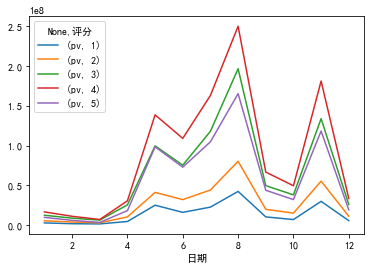

In [209]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题
df_stack.plot()

In [210]:
df_stack.stack().head(10)   #逆向操作还原unstack与stack互逆

pv
日期 评分          
1  1    2613452
   2    5294359
   3   12273331
   4   16452340
   5    9580889
2  1    1608795
   2    3747792
   3    8608216
   4   10941690
   5    5819374

## 3，使用pivot简化透视数据

In [211]:
df_group.head(10)

pv
日期 评分          
1  1    2613452
   2    5294359
   3   12273331
   4   16452340
   5    9580889
2  1    1608795
   2    3747792
   3    8608216
   4   10941690
   5    5819374

In [212]:
df_reset = df_group.reset_index()
df_reset.head(10)

,日期,评分,pv
0,1,1,2613452
1,1,2,5294359
2,1,3,12273331
3,1,4,16452340
4,1,5,9580889
5,2,1,1608795
6,2,2,3747792
7,2,3,8608216
8,2,4,10941690
9,2,5,5819374


In [213]:
df_pivot = df_reset.pivot("日期","评分","pv")
df_pivot.head()

评分,1,2,3,4,5
日期,,,,,
1,2613452,5294359,12273331,16452340,9580889
2,1608795,3747792,8608216,10941690,5819374
3,1344378,2772172,6156512,6911661,3228406
4,4397883,10147641,25330546,30406281,18070625
5,24893943,41021601,99671422,138699142,98385825


<AxesSubplot:xlabel='日期'>

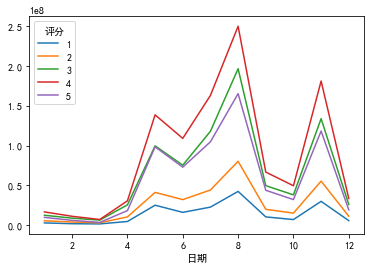

In [214]:
df_pivot.plot()

pivot相当于对DataFrame先使用set_index创建分成索引 然后再调用unstack